# Perceptron

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from IPython.display import clear_output
np.random.seed(1337)

## Function definitions

### Bounds

In [ ]:
def C(N,P):
    if P<=N:
        return 2**P
    else:
        return (math.e*P/N)**N
    
def eps(delta,N,P):
    f=C(N,2*P)
    return np.sqrt(8/P*np.log(4*f/delta))

def epsfinder(N):
    P=1
    while True:
        if eps(0.01,N,P)<=0.1:
            break
        P+=1
    return P

### General

In [ ]:
def H(x):
    return np.heaviside(-x,0) #0 if x> 0, 1 otherwise

def sgn(x):
    return np.sign(np.sign(x)+0.1) #to make sgn(0)=1

def validate(x, w):
    return H(np.dot(x, w))  #if innerproduct positive, do nothing/H=0

def predict(x,w):
    return sgn(np.dot(x, w))


## Perceptron Class

## N=3 test perceptron

In [ ]:
xi = np.array([[1, 1, 1],     #x_1->x_N
               [1, 0, 0],
               [0, 1, 1],
               [0, 0, 0]])
t = np.array([1, -1, -1, -1])

def prep_input(xi,t):
    xi=np.c_[np.ones(np.shape(xi)[0]),xi] #add x_0=1
    z=(xi.T * t).T                        #multiply every row with it's label
    return z

x = prep_input(xi,t)

In [ ]:
perceptron = Perceptron(3)
perceptron.train(x)

NameError: ignored

In [ ]:
inputs = np.array([[1,1,1,1],[1,1,0,0],[1,0,1,1],[1,0,0,0]])
r=predict(inputs,perceptron.w)
print(r)

[ 1. -1. -1. -1.]


# Perceptron 2a



In [62]:
#generate data.
def generatedata(P,N) : 
  patterns=np.random.randint(2, size=(P, N))
  outputs=2*np.random.randint(2, size=P)-1
  return patterns, outputs

def learning(w, patterns, outputs, eta=1): #w is initial perceptron, patterns and outputs is the data it trains on and that it has to classify. eta is the learning rate
  x=prep_input(patterns, outputs)
  #print(x)
  iter=1
  n=np.sum(validate(x,w))
  #print(n)
  while n>0:
    w += eta * np.dot(validate(x,w),x)
    iter += 1
    n=np.sum(validate(x,w))
    #print(w, iter)
    if iter>1000:
      #print("Perceptron did not converge in 1000 iterations")
      return w, "error", float(n)/p
  #print("Perceptron converged in ",iter," iterations.")
  return w, iter, 0



## perceptron 2b

Since N=50, 2N=100.
I will generate data, create a random w as initial perceptron for about 20 different P's less than 100 and expect that most of these cases will converge. I will also do so for about 20 different P's greater than a 100 and see that those problems do not converge.

In [64]:
# P<2n
N=50

psunder2n=np.random.randint(1,99,20)

for p in psunder2n:
  patterns, ys=generatedata(p, N)
  w=np.random.random(N+1)
  print(learning(w, patterns, ys)[1])

psover2n=np.random.randint(101, 5000, 20)

print("now we look at it for p's greater than 2N")

for p in psover2n:
  patterns, ys=generatedata(p, N)
  w=np.random.random(N+1)
  print(learning(w, patterns, ys)[1])

426
79
773
719
80
error
19
28
37
272
10
17
error
667
6
31
76
99
error
178
now we look at it for p's greater than 2N
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


We see in the first part relatively few errors, so convergence happens in almost all the cases. In the second part, almost everything is error, so the rule never converges (within 1000 iterations).

## perceptron 2c




/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


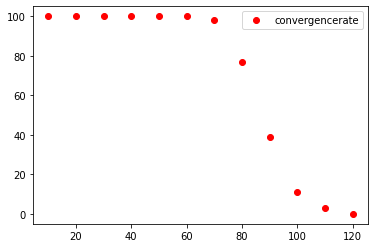

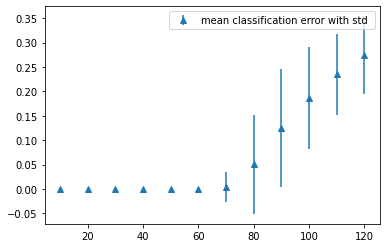

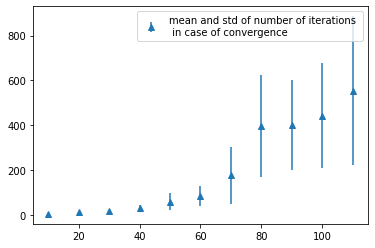

In [69]:
ps=np.arange(10,121,10)
nruns=100

convergencerate=[]
meanclasserror=[]
stdclasserror=[]
meaniterations=[]
stditerations=[]
for p in ps:
  nonconvergence=0
  numberofiterations=[]
  classificationerror=[]
  for run in range(nruns):
    pats,outs=generatedata(p,N) 
    w=np.random.random(N+1)
    wfinal, iter, classerr=learning(w, pats, outs) #so far similar to b)

    #keep track of number of nonconvergence
    if iter=="error":
      nonconvergence+=1
      classificationerror.append(classerr)
    else:
      numberofiterations.append(iter)
      classificationerror.append(0)

  convergencerate.append(100-nonconvergence)
  meanclasserror.append(np.mean(classificationerror))
  stdclasserror.append(np.std(classificationerror))
  meaniterations.append(np.mean(numberofiterations))
  stditerations.append(np.std(numberofiterations))

plt.figure()
plt.plot(ps, convergencerate, 'ro', label = "convergencerate")
plt.legend()
plt.show()
plt.figure
plt.errorbar(ps, meanclasserror, stdclasserror,linestyle='None', marker='^', label="mean classification error with std ")
plt.legend()
plt.show()
plt.figure()
plt.errorbar(ps, meaniterations, stditerations,linestyle='None', marker='^', label="mean and std of number of iterations \n in case of convergence")
plt.legend()
plt.show()
    
  

##Perceptron 3

We plot the bound for C(N,P) in red, while plotting the real C(N,P) which we get by multiplying the convergencerate by the total number of problems. We can get the convergencerate in a similar manner as above, and we assume it is a good enough approximation.

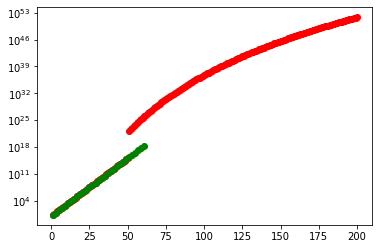

In [83]:
N=50
P=np.arange(1,200)
plt.figure()
plt.yscale("log")
for p in P:
  plt.plot(p, C(N,p), 'ro')
plt.plot(200, C(N, 200), 'ro', label="bound")


ps=np.arange(1,200,2)
nruns=50

convergencerate=[]

for p in ps:
  nonconvergence=0
  for run in range(nruns):
    pats,outs=generatedata(p,N) 
    w=np.random.random(N+1)
    wfinal, iter, classerr=learning(w, pats, outs) #so far similar to b)

    #keep track of number of nonconvergence
    if iter=="error":
      nonconvergence+=1
      

  convergencerate.append(0.02*(50-nonconvergence)*(2**p))
 


plt.plot(ps, convergencerate, 'go', label = "number of linearly separable problems")
#plt.legend()
plt.show()


We see that for $N<P$ the bound is sharp. Then for a little bit, with $P>N$ we see that the bound leaves a lot of space. After that we get no data, probably because the number of convergent problems is very low, so we will get a 0 convergence rate. Since $\log(0)$ can't be taken and we are looking at a logarithmic scale this cannot be shown.

## Perceptron 4a

$$\delta=4m(2P)\exp{\left(-\frac{\epsilon^2P}{8}\right)}$$
$$\epsilon=\sqrt{\frac{8}{P}\ln{(\frac{4m(2P)}{\delta})}}$$

$$\delta=0.01$$
$$C(N,P)=2^P\text{ if }P\leq N$$
$$C(N,P)\leq (\frac{eP}{N})^N$$
$$M(2P)=C(N,2P)\leq (\frac{2eP}{N})^N$$

Using the formula for $\delta$ above compute an expression of $\epsilon$ in terms of N and P and
$\delta$ = 0.01. Approximate m(P) = C(N, P) by its bound as given in exercise 3. Compute numerically for N = 10 the dependence of $\epsilon$ on P. Compute the number of patterns P
to ensure that $\epsilon \approx 0.1$. Repeat this for N = 20, 30, 40, 50. Note, that the required number
of patterns scales linearly with N.

In [ ]:
class TaughtPerceptron:

    def __init__(self, N, eta=1):
        self.eta = eta
        self.w = np.random.randn(N+1)

#validate(x,self.w) is a row of ones and zeros, ones indicating wrong patterns
# so np.dot(validate, x) is the sum of all wrong patterns
    def train(self, x):
      iter=1
      while np.sum(validate(x,self.w))>0:
        self.w += self.eta * np.dot(validate(x,self.w),x)
        iter += 1
        if iter>1000:
          print("Perceptron did not converge in 1000 iterations")
          break
      print("Perceptron converged in ",iter," iterations.")

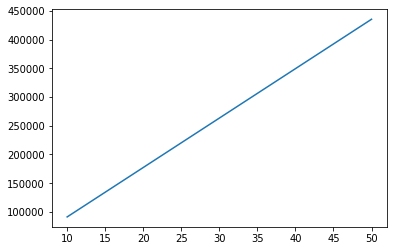

In [ ]:
N_range=np.arange(10,60,10)
eps_range=[]
for N in N_range:
    eps_range.append(epsfinder(N))
    
plt.plot(N_range,eps_range)

In [ ]:
print(eps_range)

## Perceptron 4b

In [ ]:
def generate_set(N,P,w_teacher):
    #random binary array, dimensions P, N
    xi=np.random.randint(2, size=(P, N))
    #add x_0=1, size is now P, N+1
    xi=np.c_[np.ones(P),xi]

    #generate teacher labels
    y=predict(xi,w_teacher)
    #multiply every row with its label
    x=(xi.T * y).T
    return xi,x,y

N=10
w_teacher=np.random.randn(N+1)
P_train_array=np.array([10,50,100,500,1000])
P_test=10000
delta=0.01
n_learning_runs=100

xi_test,x_test,y_test=generate_set(N,P_test,w_teacher)

error_train=[]
error_test=[]
for P_train in P_train_array:
  print("\n P_train=",P_train,"\n")
  xi_train,x_train,y_train=generate_set(N,P_train,w_teacher)

  avg_error_train=[]
  avg_error_test=[]

  for n in range(1,n_learning_runs+1):
    print("Run ",n,"/",n_learning_runs,":...")
    perceptron = TaughtPerceptron(N)
    perceptron.train(x_train)

    sol_train=predict(xi_train,perceptron.w)
    avg_error_train.append(np.mean(np.not_equal(sol_train,y_train)))

    sol_test=predict(xi_test,perceptron.w)
    avg_error_test.append(np.mean((np.not_equal(sol_test,y_test))))

  error_train.append(np.mean(avg_error_train))
  error_test.append(np.mean(avg_error_test))
  #clear_output(wait=True)




 P_train= 10 

Run  1 / 100 :...
Perceptron converged in  2  iterations.
Run  2 / 100 :...
Perceptron converged in  2  iterations.
Run  3 / 100 :...
Perceptron converged in  2  iterations.
Run  4 / 100 :...
Perceptron converged in  2  iterations.
Run  5 / 100 :...
Perceptron converged in  1  iterations.
Run  6 / 100 :...
Perceptron converged in  2  iterations.
Run  7 / 100 :...
Perceptron converged in  2  iterations.
Run  8 / 100 :...
Perceptron converged in  2  iterations.
Run  9 / 100 :...
Perceptron converged in  2  iterations.
Run  10 / 100 :...
Perceptron converged in  2  iterations.
Run  11 / 100 :...
Perceptron converged in  2  iterations.
Run  12 / 100 :...
Perceptron converged in  1  iterations.
Run  13 / 100 :...
Perceptron converged in  2  iterations.
Run  14 / 100 :...
Perceptron converged in  2  iterations.
Run  15 / 100 :...
Perceptron converged in  2  iterations.
Run  16 / 100 :...
Perceptron converged in  2  iterations.
Run  17 / 100 :...
Perceptron converged in  2  it

In [ ]:
print(error_train)
print(error_test)

error_theory=[eps(delta,N,P_train) for P_train in P_train_array]
print(error_theory)

plt.plot(P_train_array,error_test, label="Error Test")
plt.legend()
plt.xlabel("P")
plt.ylabel("Error")

plt.figure()
plt.plot(P_train_array,error_theory, label="Error Bound")
plt.legend()
plt.xlabel("P")
plt.ylabel("Error")

plt.figure()
plt.plot(P_train_array,[i/j for i,j in zip(error_theory,error_test)], label="Error Bound/Error Test")
plt.legend()
plt.xlabel("P")
plt.ylabel("Error fraction")

In [ ]:
pd.DataFrame([error_test,error_theory], ["Error","Bound error theory"],P_train_array)

,10,50,100,500,1000
Error,0.156271,0.074703,0.054307,0.008502,0.00442
Bound error theory,4.282330,2.498554,1.917264,0.996339,0.74283
